## XAI eXplainable Artificial Intelligence

### 설명 가능한 AI

* 해석 가능성의 측면에서 머신러닝 모델($RF,\,\,SVM,\,\,XGB$ 등)은 회귀 계수를 갖는 선형모형(선형회귀, 로지스틱회귀)에 비해
<br>입력 변수가 예측 결과를 만들어 내는데 어떤 역할을 하는지 이해하기 어렵다.
* 여기서 소개할 다양한 방법을 통해 머신러닝 모델에서 입력 변수들이 어떤 영향력을 갖는지 알 수 있다.
<br><br>
* 다만, XAI 기법은 현상에 대한 모형의 예측을 설명하기 위한 것이지, 현상 자체를 설명하기 위한 것이 아니다.
* 즉, 어디까지나 **_X1이 증가할수록 Y도 증가한다_** 는 **상관 관계**를 나타낼 뿐, 이유를 설명하는 **인과 관계**까지 포함하는 것은 아니다.


## 변수 중요도 Feature Importance

* 학습된 모형에 대해 **반응 변수(Y)** 와의 관련성 또는 예측 관점에서 **각 설명 변수(X)** 들의 영향력을 수치화한 것

### 0> 데이터 준비

|컬럼|설명|
|-|-|
|CRIM|자치시(town) 별 1인당 범죄율|
|ZN|$25,000 ft^2$를 초과하는 거주지역의 비율|
|INDUS|비소매상업지역이 점유하고 있는 토지의 비율|
|CHAS|찰스강에 대한 더미 변수(강의 경계에 위치한 경우 1, 아니면 0)|
|NOX|$10ppm$당 농축 일산화질소|
|RM|주택 1가구당 평균 방의 개수|
|AGE|1940년 이전에 건축된 소유주택의 비율|
|DIS|5개의 보스턴 직업센터까지의 접근성 지수|
|RAD|방사형 도로까지의 접근성 지수|
|TAX|10,000달러 당 재산세율|
|PTRATIO|자치시(town)별 학생/교사 비율|
|B|$1,000(Bk-0.63)^2$, Bk는 자치시(town)별 흑인의 비율|
|LSTAT|모집단의 하위계층의 비율(%)|
|Y : **MEDV**|본인 소유의 주택가격(중앙값) (단위: $1,000)|

In [1]:
import pandas as pd
from sklearn import datasets

X, Y = datasets.fetch_openml('boston', return_X_y=True, version=1)
df1 = pd.concat([X, Y], axis=1)
df1.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


### 1> 상관계수 Correlation

* 반응 변수에 대해 상관 관계가 클수록 중요한 설명 변수
* 절댓값이 1에 가까울수록 강한 상관 관계가 있고, 0에 가까울수록 상관 관계가 없다. ($\left\vert Cor \right\vert < 1$)
* 종류 : **피어슨(Pearson Cor Coef)** , 스피어만(Spearman Cor Coef), 크론바흐의 알파(Cronbach's Alpha)

<br>

|장점|단점|
|-|-|
|-1에서 +1 사이 값으로 변수 간 관계와 패턴을 직관적으로 확인&nbsp;&nbsp;|선형 관계만 제대로 측정|
|공분산과 달리 변수들의 단위가 달라도 비교 가능|어느 정도가 강한 관계인지 분석 분야나 데이터 특성에 따라 다르게 해석&nbsp;&nbsp;|
|모델의 학습 불필요|범주형 변수로는 부적합|

<center>피어슨 상관계수 (Pearson Correlation Coefficient, PCC)</center>

$$
r_{XY} = {Cov(X,Y) \over \sigma_X\sigma_Y} = {\sum^n_i(X_i - \overline{X})(Y_i - \overline{Y}) \over \sqrt{\sum^n_i(X_i - \overline{X})^2} \sqrt{\sum^n_i(Y_i - \overline{Y})^2}}
$$

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import seaborn as sns

import scipy.stats as spst
import numpy as np

In [3]:
cat_cols1 = ['CHAS', 'RAD']
num_cols1 = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] # list(set(df1.columns) - set(cat_cols1))

In [236]:
corr_for_heatmap = df1[num_cols1].corr(method='pearson', numeric_only=True)

num_cols1_x = num_cols1[:-1]
medv_corr_df = pd.DataFrame()
for col in num_cols1_x:
    stat, _ = spst.pearsonr(df1[col], df1['MEDV'])
    temp = pd.DataFrame(data=[np.round(stat, 4)], index=[col], columns=['MEDV_CORR'])
    medv_corr_df = pd.concat([medv_corr_df, temp], axis=0)
    medv_corr_df.sort_values(by='MEDV_CORR', ascending=True, inplace=True)

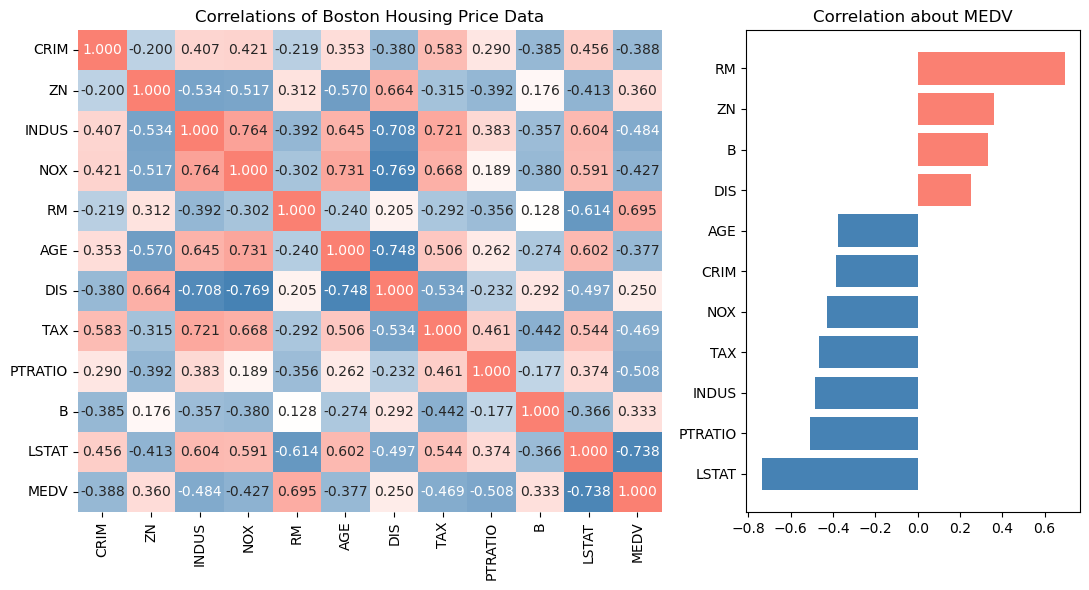

In [237]:
custom_cmap = LinearSegmentedColormap.from_list(
    'custom_heatmap',
    ['steelblue', 'white', 'salmon'],
    N=256
)
custom_color = ['salmon' if val > 0 else 'steelblue' for val in medv_corr_df['MEDV_CORR']]

plt.figure(figsize=(11, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[7, 4])

# 히트맵
ax1 = plt.subplot(gs[0])
sns.heatmap(data=corr_for_heatmap,
            annot=True,
            fmt='.3f',
            cmap=custom_cmap,
            cbar=False,
            ax=ax1)
ax1.set_title("Correlations of Boston Housing Price Data")

# 막대그래프
ax2 = plt.subplot(gs[1])
ax2.barh(medv_corr_df.index, medv_corr_df['MEDV_CORR'], color=custom_color)
ax2.set_title("Correlation about MEDV")

plt.tight_layout()
plt.show()

In [238]:
medv_corr_df.T

,LSTAT,PTRATIO,INDUS,TAX,NOX,CRIM,AGE,DIS,B,ZN,RM
MEDV_CORR,-0.7377,-0.5078,-0.4837,-0.4685,-0.4273,-0.3883,-0.377,0.2499,0.3335,0.3604,0.6954


#### 그래프 해석

* **LSTAT, RM, PTRATIO, INDUS, ZN** 순으로 강한 상관 관계를 갖는다.

In [7]:
strong_feature1 = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'ZN']

### 2> 회귀 계수 Linear Regression Coefficient


|장점|단점|
|-|-|
|단순한 선형 회귀 모델로 구현이 쉽고 직관적|단위에 영향을 받으므로 전처리가 필요하고 이상치에 민감&nbsp;&nbsp;|
|설명 변수의 영향력 방향을 명확하게 파악 가능&nbsp;&nbsp;|실제 모형이 비선형인 경우 부적합|

<center>다중 회귀 분석 최소제곱법(Ordinary Least Squares)</center>

$$
\hat{Y} = \beta_0X_0 + \beta_1X_1 + ... + \beta_nX_n + \epsilon
$$
$$
\hat{\beta} = (X^TX)^{-1}X^TY
$$

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import matplotlib.cm as cm

In [149]:
x2, y2 = X.copy(), Y.copy()

x2 = pd.get_dummies(data=x2, columns=cat_cols1, drop_first=True)

scaler = MinMaxScaler()
x2_s = scaler.fit_transform(x2)

lr = LinearRegression().fit(x2_s, y2)
coef_sum = np.sum(np.abs(lr.coef_))
lrc = np.abs(lr.coef_) / coef_sum

lrc_df = pd.DataFrame(lrc, index=x2.columns, columns=['LRC'])
lrc_df.sort_values(by='LRC', inplace=True)

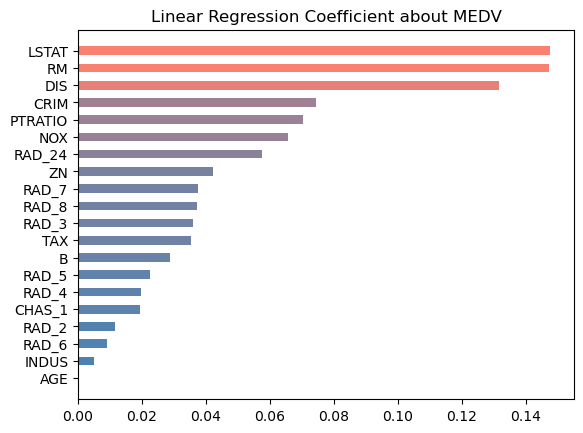

In [241]:
custom_cmap2 = LinearSegmentedColormap.from_list(
    'custom_heatmap',
    ['steelblue', 'salmon'],
    N=256
)

norm = plt.Normalize(lrc_df['LRC'].min(), lrc_df['LRC'].max())
mapper = cm.ScalarMappable(norm=norm, cmap=custom_cmap2)
custom_cmap_barh = [mapper.to_rgba(v) for v in lrc_df['LRC']]

plt.barh(lrc_df.index, lrc_df['LRC'], height=0.5, color=custom_cmap_barh)
plt.title("Linear Regression Coefficient about MEDV")
plt.show()

#### 그래프 해석

* **LSTAT, RM, DIS, CRIM, PTRATIO** 순으로 큰 회귀 계수를 갖는다.

In [8]:
strong_feature2 = ['LSTAT', 'RM', 'DIS', 'CRIM', 'PTRATIO']

### 3> 평균 불순도 감소량 Mean Decrease Impurity

* 트리 게열 모델에서 개별 트리의 불순도(Imputirty)의 변화량을 이용해 변수 중요도를 계산
* **불순도 감소량이 큰 변수일수록 중요한 설명 변수**
* Gini Importance(GI) : 불순도 측도가 지니 계수(Gini Index)인 경우 변수 중요도

각 특성 $X$에 대해
$$
Importance(X) = \sum_{t\in{nodes\,where\,X\,used}}\Bigg({N_t \over N} \cdot \Delta{i}(t)\Bigg)
$$

* $t$ : 트리의 노드
* $N_t$ : 노드 $t$에 도달한 샘플 수
* $N$ : 전체 샘플 수 (루트 노드 기준)
* $\Delta{i}(t)$ : 노드 $t$에서 특성 $X$로 분할 시 줄어든 불순도

트리 전체에서 **특정 특성이 분할 기준으로 사용**될 때마다 얼마나 불순도를 줄였는지에 대해 **샘플 수로 가중 평균**하여 계산

(다른 계산 방법)

개별 트리의 개수 $M$, 개별 트리의 특정 노드(마디) $R$ 에서의 불순도 $Imp(R)$

$I_{jm}$ = $m = 1, ... , M$ 에 대해 개별 트리를 $t_m$에서의 중요도

$$
I_{jm} = \sum_{R:j\in{R}\in{t_m}} \Bigg[{n_R \over n}Imp(R) - {n_{R_{left}} \over n}Imp(R_{left}) - {n_{R_{right}} \over n} Imp(R_{right})\Bigg]
$$

$I_j$ = $j$번째 변수에 대한 중요도

$$
I_j = {1 \over M}\displaystyle\sum_{m=1}^{M}I_{jm}
$$


#### 불순도
* 여러 가지의 클래스가 섞여 있는 정도

    - ex) $A$ = [0, 0, 0, 0], $B$ = [0, 0, 1, 1], $C$ = [1, 1, 1, 1]
    - $A$와 $C$는 순도 100% (엔트로피 0), $B$가 불순도가 높음

$$
Entropy(S) = \displaystyle\sum_{i=1}^{c}p_i \cdot I(x_i), \quad
I(x) = log_2{1 \over p(x)}
$$


In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV

from matplotlib.colors import Normalize
from matplotlib import colormaps

In [10]:
x3, y3 = x2_s.copy(), y2.copy()

In [11]:
params_dt = {'max_features':('sqrt', 'log2'),
             'max_depth':range(3, 20, 2)}
model_dt = GridSearchCV(DecisionTreeRegressor(random_state=42),
                        param_grid=params_dt,
                        scoring='neg_mean_squared_error', # MSE는 작을수록 좋으므로, GridSearch가 클수록 좋은 값으로 학습하기 위해 음수 변환
                        cv=5)
model_dt.fit(x3, y3)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(3, 20, 2),
                         'max_features': ('sqrt', 'log2')},
             scoring='neg_mean_squared_error')

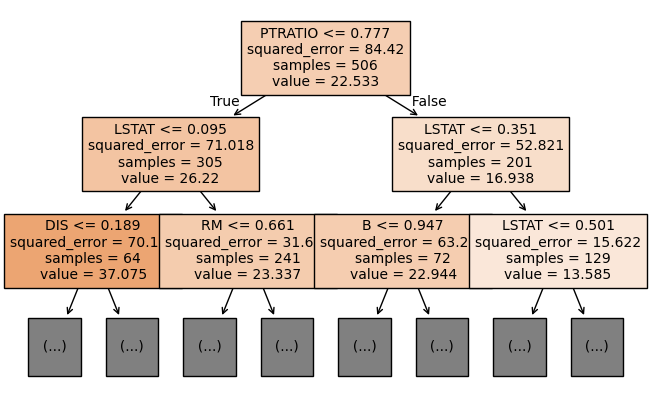

In [267]:
model_dt_best = model_dt.best_estimator_

plt.figure(figsize=(8, 5))
plot_tree(model_dt_best,
          feature_names=x2.columns,
          max_depth=2, # plot에 표시할 트리의 최대 깊이
          filled=True, # 각 노드의 색상을 클래스별 순수도/분산에 따라 다른 색으로 채우기
          fontsize=10)
plt.show()

In [268]:
def plot_FI(imp, cols, figsize_, topn=0):
    imps = np.array(imp)
    columns = np.array(cols)

    fi_df = pd.DataFrame({'Feature':columns, 'Feature_Importance':imps})
    fi_df.sort_values(by='Feature_Importance', ascending=False, inplace=True)
    fi_df.reset_index(drop=True, inplace=True)

    if not topn:
        fi_df2 = fi_df.copy()
    else:
        fi_df2 = fi_df.iloc[:topn].copy()
    
    norm = Normalize(vmin=fi_df2['Feature_Importance'].min(), vmax=fi_df2['Feature_Importance'].max())
    cmap = colormaps['coolwarm']
    colors = [cmap(norm(val)) for val in fi_df2['Feature_Importance']]

    plt.figure(figsize=figsize_)
    sns.barplot(x='Feature_Importance', y='Feature', data=fi_df2, hue='Feature', palette=colors, legend=False)
    plt.title("Feature Importance from Decision Tree")
    plt.show()

    return fi_df2

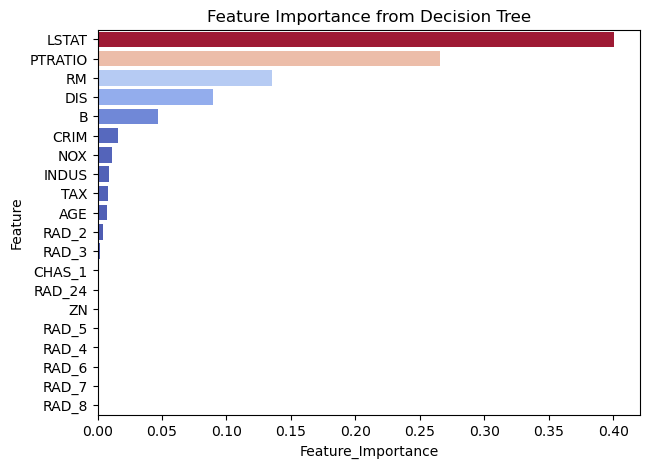

In [269]:
fi_df = plot_FI(model_dt_best.feature_importances_, x2.columns, (7,5))

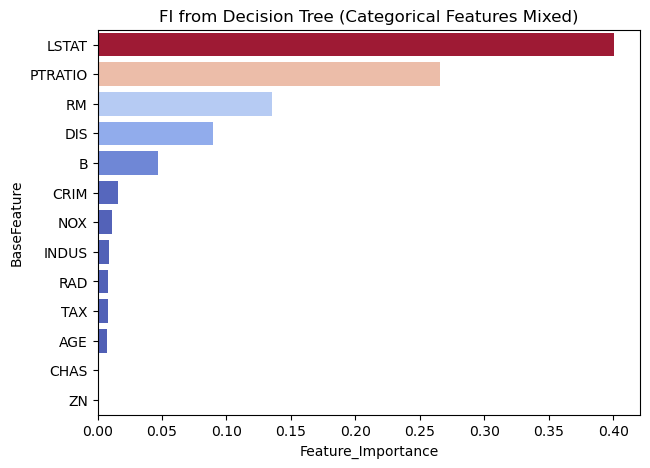

In [270]:
fi_df['BaseFeature'] = fi_df['Feature'].str.extract(r'(^[^_]+)')  # RAD_1, RAD_2, ... -> RAD
fi_grouped = fi_df.groupby('BaseFeature')['Feature_Importance'].sum().reset_index()
fi_grouped.sort_values(by='Feature_Importance', ascending=False, inplace=True)

norm = Normalize(vmin=fi_grouped['Feature_Importance'].min(), vmax=fi_grouped['Feature_Importance'].max())
cmap = colormaps['coolwarm']
colors = [cmap(norm(val)) for val in fi_grouped['Feature_Importance']]

plt.figure(figsize=(7,5))
sns.barplot(x='Feature_Importance', y='BaseFeature', data=fi_grouped, hue='BaseFeature', palette=colors, legend=False)
plt.title("FI from Decision Tree (Categorical Features Mixed)")
plt.show()

#### 그래프 해석

* **LSTAT, TAX, PTRATIO, DIS, NOX** 순으로 불순도가 높다.
* 범주형 변수인 **CHAS**와 **RAD**를 다시 합쳤을 때도 변수 중요도 순위에 큰 변화가 없다.

In [14]:
strong_feature3 = ['LSTAT', 'TAX', 'PTRATIO', 'DIS', 'NOX']

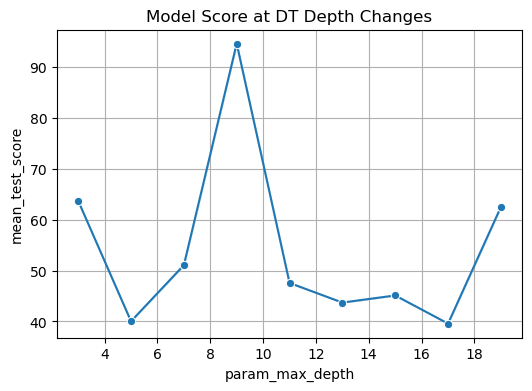

In [329]:
gs_result_df = pd.DataFrame(model_dt.cv_results_)

plt.figure(figsize=(6,4))
sns.lineplot(x='param_max_depth', y=gs_result_df['mean_test_score'].abs(), data=gs_result_df, marker='o')
plt.title("Model Score at DT Depth Changes")
plt.grid()
plt.show()

### 4> 순열 변수 중요도 Permutation Feature Importance

* 테스트 데이터 셋의 각 변수를 재배열(Permutation) 한 후의 예측력이 얼마나 변하는지 확인하는 변수 중요도
* 특정 변수를 재배열하더라도 정확도의 변화가 없다면 그 변수는 영향력이 적다.
* 반대로 정확도의 변화가 클수록 변수의 영향력이 크다.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [278]:
x_train_s, x_val_s, y_train, y_val = train_test_split(x2_s, y2, test_size=0.2)

In [283]:
params_dt = {'max_features':('sqrt', 'log2'),
             'max_depth':range(3, 20, 2)}
model_dt2 = GridSearchCV(DecisionTreeRegressor(random_state=42),
                        param_grid=params_dt,
                        scoring='neg_mean_squared_error',
                        cv=5)
model_dt2.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(3, 20, 2),
                         'max_features': ('sqrt', 'log2')},
             scoring='neg_mean_squared_error')

In [284]:
PFI = permutation_importance(model_dt2.best_estimator_,
                             x_val_s, y_val,
                             n_repeats=10,
                             scoring='neg_mean_squared_error',
                             random_state=42)

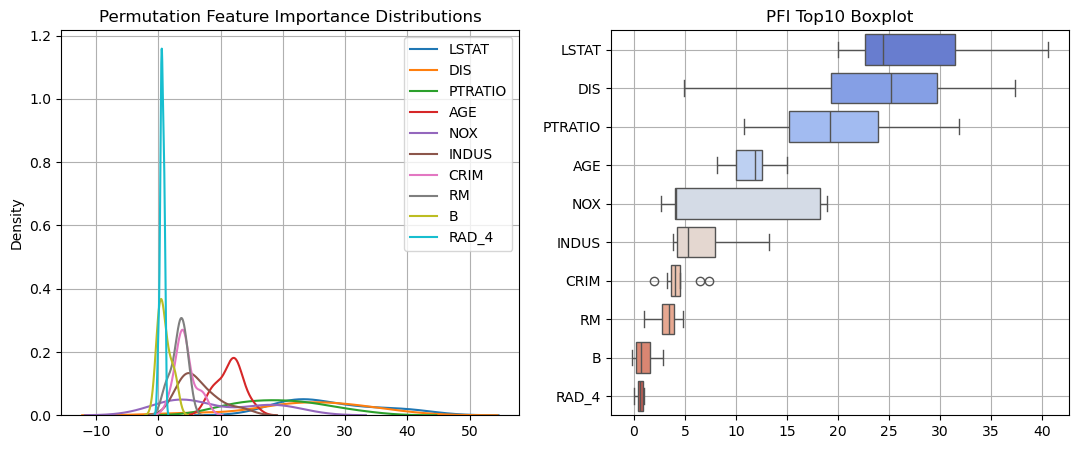

In [ ]:
importances_mean = PFI.importances_mean
sorted_idx = np.argsort(importances_mean)[::-1][:10]

pf_df = pd.DataFrame(PFI.importances.T, columns=x2.columns)
top_features = pf_df.mean().sort_values(ascending=False).head(10).index
pf_top = pf_df[top_features]

plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
for i in sorted_idx:
    importances = PFI.importances[i]
    if np.std(importances) > 0:
        sns.kdeplot(importances, label=x2.columns[i])
plt.title("Permutation Feature Importance Distributions")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=pf_top, orient='h', palette='coolwarm')
plt.title("PFI Top10 Boxplot")
plt.grid()

plt.show()

#### 그래프 해석
* X축: 모델 성능 변화량 (MSE 변화)
    - MSE는 낮을 수록 좋은 점수
    - 변수의 PFI 값이 오른쪽으로 갈수록 permute 성능이 더 많이 나빠짐 (더 중요한 feature)

* **LSTAT**은 그래프에서 가장 오른쪽으로 길게 분포한다. 즉, 모델이 LSTAT에 크게 영향을 받는다.
* **DIS**는 그래프에서 두 번째로 큰 값들로 분포한다. 다만, whisker(IQR 이상치 범위)가 길기 때문에 중요도가 불안정하다.
* **AGE**는 KDE 밀도가 낮지만 분포가 좁다. 또한 위에서 4번째이므로 평균적으로 영향력이 있다.

In [16]:
strong_feature4 = ['LSTAT', 'DIS', 'PTRATIO', 'AGE', 'NOX']

### 5> 부분 의존도 Partial Dependence

* 설명 변수(특성)이 특정 값으로 변할 때, 모델 예측값의 평균이 어떻게 변하는지를 시각화
* **다른 feature는 고정**하고, 특정 feature 하나만 변화시킬 때 모델의 반응을 관찰

In [57]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from collections import Counter

In [60]:
strong_f_count = Counter(strong_feature1) + Counter(strong_feature2) + Counter(strong_feature3) + Counter(strong_feature4)
print(strong_f_count)

Counter({'LSTAT': 4, 'PTRATIO': 4, 'DIS': 3, 'RM': 2, 'NOX': 2, 'INDUS': 1, 'ZN': 1, 'CRIM': 1, 'TAX': 1, 'AGE': 1})


In [ ]:
# 앞선 1~4 에서 영향력 상위 5개의 특성 통합합
strong_f_dict = {}
for f, cnt in strong_f_count.most_common(5):
    strong_f_dict[f] = list(x2.columns).index(f)
print(strong_f_dict)

{'LSTAT': 10, 'PTRATIO': 8, 'DIS': 6, 'RM': 4, 'NOX': 3}


In [151]:
pd_feature = 'LSTAT'

# x2_s : 학습에 사용했던 전처리 된 train 데이터 (모델이 학습한 분포와 동일한 분포로 PDP를 계산해야 해석이 자연스럽고 왜곡이 적음.)
PD = partial_dependence(model_dt_best, # 기존에 학습 완료한 모델
                        X=x2_s,
                        features=[strong_f_dict[pd_feature]]) # 변화시킬 feature의 index, [0, 3]: 각각에 대한 PD, [(0, 3)]: 이변량 PD

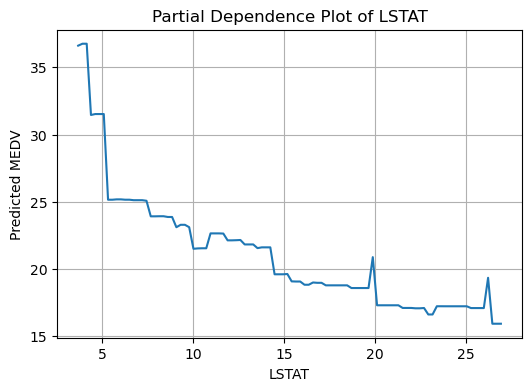

In [153]:
grid_values = PD['grid_values'][0] # LSTAT 값의 변화
average = PD['average'][0] # LSTAT 값에 따른 예측값 평균
# original_grid = scaler.data_max_[10] * grid_values + scaler.data_min_[10] * (1 - grid_values)
original_grid = scaler.inverse_transform(np.eye(len(x2.columns))[10] * grid_values[:, None])[:, 10]

plt.figure(figsize=(6, 4))
sns.lineplot(x=original_grid, y=average)
plt.title("Partial Dependence Plot of " + pd_feature)
plt.xlabel(pd_feature)
plt.ylabel("Predicted MEDV")
plt.grid()
plt.show()

# temp = pd.DataFrame(x2_s, columns=x2.columns)
# PartialDependenceDisplay.from_estimator(model_dt_best, X=temp, features=['LSTAT'])
# plt.grid()
# plt.show()

#### 그래프 해석 1

* LSTAT이 낮을수록 예측값(MEDV 주택가격)이 높게 예측
* LSTAT이 커질수록 대체적으로 예측값이 감소
* **4와 6 근처에서 예측값이 급격히 감소**하는 것으로 보아, 모델(Decision Tree)이 해당 값으로 **중요한 분기**를 사용했을 것으로 보임

In [ ]:
f_names = list(strong_f_dict.keys())
f_index = list(strong_f_dict.values())

def plot_pdp(ax, model=model_dt_best, X_scaled=x2_s, f_names=f_names, f_index=f_index, scaler=None, original_scale=False):
    for feature_name, idx in zip(f_names, f_index):
        pd_result = partial_dependence(model, X=X_scaled, features=[idx], grid_resolution=40)
            # grid_resolution : 각 feature에 대해 몇 개의 값으로 모델 예측을 계산할지 (PTRATIO 고유값이 46이므로 이보다 작은 수 40)
        grid_values = pd_result['grid_values'][0]
        average = pd_result['average'][0]

        if original_scale and scaler is not None:
            temp = np.zeros((len(grid_values), X_scaled.shape[1]))
            temp[:, idx] = grid_values
            grid_values = scaler.inverse_transform(temp)[:, idx]

        sns.lineplot(x=grid_values, y=average, ax=ax, label=feature_name, linewidth=2.0)

    ax.grid()
    ax.legend()

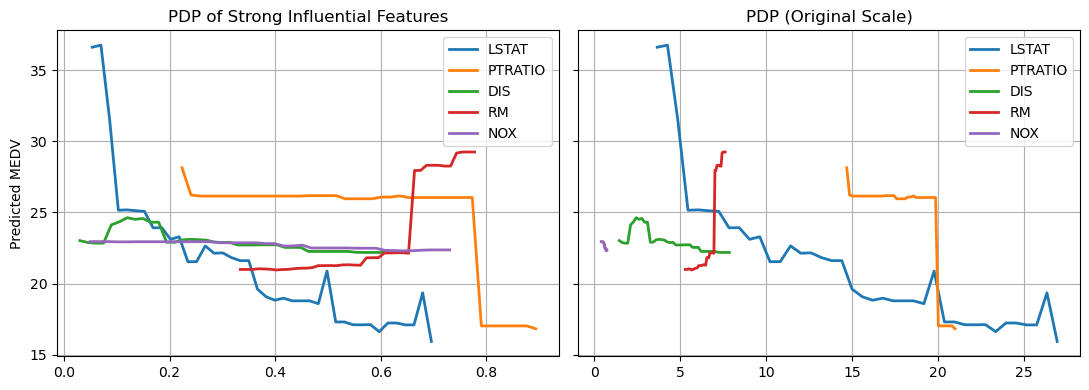

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4), sharey=True)

# 왼쪽: Scaled PDP
axes[0].set_title("PDP of Strong Influential Features")
axes[0].set_ylabel("Predicted MEDV")
plot_pdp(axes[0])

# 오른쪽: 원본 데이터의 PDP
axes[1].set_title("PDP (Original Scale)")
plot_pdp(axes[1], scaler=scaler, original_scale=True)

plt.tight_layout()
plt.show()


#### 그래프 해석 2

* **DIS와 NOX**의 PDP 예측값이 23 부근에서 거의 수평선으로 일정하다.
    - 즉, 이전 결과들을 통합한 내용과 달리 영향력이 거의 없다.

* **RM**은 정규화 PDP 그래프에서는 특정 구간에서만 예측값에 영향을 미치는 것으로 보였으나, 실제 데이터의 분포가 좁다.
    - 즉, 약간의 데이터 변화에도 예측값을 민감하게 변화시킬 수 있다.

* **PTRATIO**는 [15, 20) 구간에서는 예측값 변화에 그다지 기여하지 못하지만, 전후로는 크게 변화시킨다.